

# Data preparation and exploration
Course: ITCS 4156 - Introduction to Machine Learning 

Instructor: Xiang Zhang

For students at ITCS-4156:
<br/>
<font color="blue"><b>
    

NAME: *enter your name here*

</b> </font>

## Goal
The goal of this activity is to start concretizing and reinforcing the concepts we learned in regards to problem formulation, data gathering, data visualization/exploration, and data preprocessing. 

Your job is to read through the lab and fill in any code segments that are marked by `TODO` headers and comments. It should be noted, that all the correct outputs are given below each code cell. It might be useful to duplicate all the `TODO` cells so you can try to match the correct output with your own code!


## Agenda

- Briefly review Jupyter Notebook Concepts
- Download Forest Fire Dataset from UCI Repository
- Define problem, why it needs to be solved, and how might we solve it.
- Finding data related to our problem
- Loading the data with Pandas
- Visualization and explore the data
- Clean, transform, and split the data

In [1]:
# Extra imports for this lab that are beyond the scope of discussion
import os

def todo_check(condi_err):
    failed_err = "You passed {}/{} and FAILED the following code checks:{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(condi_err):
        if not condi:
            n_failed += 1
            failed += f"\nFailed check [{check+1}]:\n\t Tip: {err}"

    if len(failed) != 0:
        passed = len(condi_err) - n_failed
        err = failed_err.format(passed, len(condi_err), failed)
        raise AssertionError(err.format(failed))
    print("Your code PASSED the code check!")

# Jupyter Notebook review
Before you start take sometime to look through the Jupyter Notebook review (mainly of commands) and try to start using some of these commands and ideas as you go through this notebook.

## Useful Jupyter tricks and commands
Below are list of commands you might find yourself frequently using. If you are using a Mac simply replace `CTRL` with `CMD`.
- List of keybindings `H`
- Run a cell when selected `CTRL-ENTER`
- Run call and move to next cell `SHIFT-ENTER`
- Insert a new cell `ESC-B`
- Convert cell to Markdown `ESC-M`
- Delete a cell `ESC-D-D`
- Save notebook `CTRL-S`
- Search only over code `ESC-F`
- Show/hide cell output `ESC-O`
- To reset your notebook's environment and memory without clearing the output, go to the menu bar at the top and navigate to `Kernel -> Restart`.
    - Other commands can be found under `Kernel` such as `Restart & Clear Output` which will clear all cell output 
    
### Note about running notebooks
Recall, notebooks should be ran sequentially! If you run cells out of order you might get errors you weren't expecting as some cells might depend on other cells being ran first! You typically want to run a notebook sequentially unless you know what you are doing.

If you ever run into errors you can't solve, try restarting the notebook by going to the `Kernel` menu option and click `Restart Kernel` or `Restart`. This will reset the kernel and you'll have to run all your cells again. This approach is akin to restarting your computer when facing errors you, sometimes it just works!

### IPython Magic commands
Jupyter notebook code cells can contain special commands which are not valid Python code but affect the behavior of the notebook. These special commands are called *magic* commands.

For instance, the one you will see most frequently is `%matplotlib inline`. This command tells matplotlib to use Jupyter Notebook's display by plotting any plots in the notebook! Otherwise, these matplotlib would create a whole separate window for each plot we create.

You can do other interesting things with magics but just be aware that any line starting with `%` in a code cell is likely a magic command. To learn more see the following tutorial: 
[Problem Solving with Python - magic commands](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.06-Magic-Commands/).

# Problem formulation

![](https://fee.org/media/38322/forest-fire-3782544_1280.jpg?anchor=center&mode=crop&height=656&widthratio=2.1341463414634146341463414634&rnd=132451547710000000)

In this week's lab (and future labs) we are going to be tackling the problem of forest fire prediction, a major environmental concern that affects forest preservations around the world. Recall, that in order to properly formulate the goal of our ML project we need to ask ourselves three questions: 

1. What is the problem?
2. Why does the problem need to be solved?
3. How would I solve the problem?

### What is the problem?
Well, as you might have already read, our problem is to predict forest fires. To be more specific, let's focus on predicting forest fires in particular parks, like national parks. By doing so, we will simplify the problem by focusing on a specific park. Our big assumption here is going to be that it will be possible to predict forest fires from data. 

But what kind of data do we need? If we do a little bit of research by searching the Internet, reading papers, and talk with experts on the subject, we'll find that natural forest fires actually tend to coincide with the weather (what a shock)!

For instance, natural fires tend to coincide with high temperatures, dry conditions, and wind. All of which tend to be commonly recorded features  in meteorological datasets [\[1\]](https://mylandplan.org/content/facts-about-fire) [\[2\]](https://www.theweathermakers.org/forest-fire-causes-weather-preventions/)! Thus, our goal will be to find a meteorological dataset for a specific national park.

### Why does the problem need to be solved (why is it important)?
Now, why are we even looking at this problem to begin with. Well, to some of you this might be obvious but let's make it clear anyways. 

One point of forest fire prediction is to help prevent fires by either predicting likely areas where they may occur or predicting how much a potential area could burn (identifying high risk areas). By making these predictions we hope to allow for faster detection of fires by focusing on particular "high risk" areas and, in turn, becoming more successful at firefighting. 

Now, this is just one way to frame why this problem needs to be solved. Feel free to think about your own personal take.

### How would I solve the problem?
To answer this question, think about how you would go about achieving or solving the problem (try to visualize what you would do for each of those 7 ML steps). Since everyone here is most likely new to ML, I'll try to walk you through my thought process.

The first step I would think about is how would we gather data? Well, we tried to answer this question earlier. Recall, we talked about narrowing our focus down to national parks. The next step would be to contact parks and see if they do indeed have any open source data (particularly meteorological data). 

Further, we could search for related problems to see if they already have datasets or we could simply try searching for a dataset related to forest fires. We'll also have to try to find a dataset that is labeled so that we can train our model to predict coordinates for which parts of the forest are likely to be vulnerable to fires or how much of an area will be burned.

Say we found some data, then what? What features will our data even have? We mentioned we would like some sort of meteorological data that maybe contains information about temperature, moisture, wind, ect. But are there other domain specific features out there? As I am no forest fire expert, I have no clue if there are! Take note as this is a place of uncertainty that we have identified and would need to further investigate.

Okay, let's also say we found some data useful meteorological and domain specific features (whatever those may be). Now, what assumptions can we make about our data? Do we know what algorithm might actually be well suited for our problem? Notice, that these questions are becoming harder and harder to answer as we attempt to plan further into the future. Once answers start becoming this vague, it might be a good idea just to start finding data so that you can further think through these more uncertain questions.

### Summary

In summary, our goal is to help prevent and make firefighting easier by identifying "high risk" areas by either predicting likely areas where forest fires may occur or predicting how much a potential area could burn when a forest fire occurs. We think we can achieve these predictions by using some sort of labeled data where our labels are either coordinates for which parts of the forest are likely to be vulnerable to fires or how much of an area will be burned.

# Gathering data
Welp, it turns out there is actually a perfect dataset for our problem! Who would have guessed, right? Recall that the [UCI Data Repository](https://archive.ics.uci.edu/ml/index.php) repository contains many different famous datasets. It just so happens that one of these datasets is called the Forest Fire Dataset. 

This dataset was captured from the Montesinho natural park (below image) in Portugal and contains meteorological data along with Fire Weather Index (FWI) features which are domain specific features used for rating fire danger. This dataset also has labels which correspond to how much forest area was burned for each data sample!


<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.PY9_GDitrSh7lTu-vd9pVwHaE1%26pid%3DApi&f=1">


## Download the Forest Fire dataset

To begin, let's download the Forest Fire dataset using the following link: https://archive.ics.uci.edu/ml/datasets/Forest+Fires. When you arrive at the UCI webite click the "Data Folder" button near the top right to download the dataset. Once clicked, download the following file: `forestfires.csv`.

While on the website feel free to take your time and explore the other information on the web-page. The web-page will provide you with information about the dataset along with research papers that have used this dataset.

Once the download, move the `forestfires.csv` file to the **SAME** directory/folder that this Jupyter Notebook is in (i.e., the current path of the notebook). We need to do this so that when we go to load the data we can easily path to the files! Run the below code to check your current notebook path and which directory this notebook is in!

Here is an example for the data path:

In [6]:
print(f"The current path for your notebook is:\n {os.getcwd()}\n")
print(f"Your notebook is currently in the following directory:\n {os.path.basename(os.getcwd())}")

The current path for your notebook is:
 C:\Users\himat\Documents\UNCC\Spring 2023\ITCS 4156 - Intro to Machine Learning

Your notebook is currently in the following directory:
 ITCS 4156 - Intro to Machine Learning


# Data loading with Pandas

Before loading our data, we need to import the Python libraries we are going to use for loading, preparation, and visualization/exploration. 

For data handling (loading, storing, and manipulation), we can use either NumPy or Pandas. For plotting, we will use Matplotlib and Pandas (which has wrappers for Matplotlib which makes plotting super easy). 

At any point if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

- [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).
- [NumPy docs](https://numpy.org/doc/stable/)
- [Matplotlib docs](https://matplotlib.org/stable/contents.html)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a python magic command mentioned above.
%matplotlib inline


Recall that Pandas is a high-level data manipulation and analysis tool built on-top of NumPy. In particular, it can be easier to work with when cleaning, visualizing, and preprocessing data. Plus, Pandas tends to be easier on the eyes when visualizing raw datasets. 

Alright, it's time to load our data and see what it looks like. If you have already spent some time looking through the web-page you might have an idea of what kind of features are contained in the dataset.

#### TODO 1
Let's load the `forestfires.csv` by using Pandas `read_csv()` function. The  `read_csv()` function works by taking in a path to a csv file (e.g., `/home/user/Downloads/forestfires.csv` could be a Linux/Mac file path; if you are using Windows, add `r` before your path). For simplicity, we are just going to pass the name of the csv as this assumes the `forestfires.csv` is in the same path as this notebook (i.e., your local path or current directory). Recall, we printed out the current directory and path of this notebook above. Make sure the `forestfires.csv` is in that directory. 

1. Load Forest Fires dataset by passing the name of the csv file "forestfires.csv" to the Pandas function `read_csv()` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Store the output into the `forestfire_df` variable.
    1. Note: we wrote a custom exception to alert you if you didn't move your csv file to the correct location. So if you are getting an error take a second to read what it says.

2. Using the `forestfire_df` DataFrame we just defined, call the `columns` class variable to store all the NAMES of the features in the dataset. Store the output into the variable `feature_names`.
    1. Note: recall that from last weeks lab, if you put a variable at the bottom of the cell Jupyter Notebook will automatically output what is contained in said variable to the notebook's output (i.e., the `Out[]` line).

In [13]:
# This line checks to make sure the forestfire.csv is in the 
# same directory as this notebook.
if not os.path.exists("forestfires.csv"):
    raise Exception(f"The forestfires.csv is not detected in your local path! " \
                    f"You need to move the 'forestfires.csv' file to the same " \
                    f"location/directory as this notebook which is {os.getcwd()}")   
# TODO 1.1
forestfire_df = pd.read_csv("forestfires.csv")
display(forestfire_df)

todo_check([
    (np.all(forestfire_df.iloc[0].values == np.array([7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0],
      dtype=object)), 'The 1st row does not match! Make sure you loaded the right dataset!')
])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Your code PASSED the code check!


In [17]:
# TODO 1.2
feature_names =forestfire_df.columns
print(f'The feature names are:\n{feature_names.values}')

todo_check([
    (np.all(feature_names.values == np.array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area'],dtype='object')), "Wrong column names detected! Make sure you used .columns!")
])

The feature names are:
['X' 'Y' 'month' 'day' 'FFMC' 'DMC' 'DC' 'ISI' 'temp' 'RH' 'wind' 'rain'
 'area']
Your code PASSED the code check!


# Data visualization and exploration

## Defining the features

Awesome! We have finally loaded our data. We can see our features but what do any of these features even mean? Welp, if you paid close attention the web-page had a description and the range of values for each feature. I'll repost the description here for convenience!

    X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
    Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    month - month of the year: 'jan' to 'dec'
    day - day of the week: 'mon' to 'sun'
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC - DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100
    wind - wind speed in km/h: 0.40 to 9.40
    rain - outside rain in mm/m2 : 0.0 to 6.4
    area - the burned area of the forest (in ha): 0.00 to 1090.84
    
If you are like me you probably understood only the meteorological features like temp, RH (relative humidity), wind, rain, area, month, and day. But what about these other features like X, Y, FFMC, DMC, DC, and ISI? 

We can almost understand X and Y but a visualization would help as the X and Y coordinates are not exactly the same as longitude and latitude. Below is very poor quality image that shows off Montesinho natural park. We can see now how the x-y coordinates correspond to certain sections of the park.

<img src="https://www.researchgate.net/profile/Paulo-Cortez-4/publication/238767143/figure/fig1/AS:298804772392991@1448252017812/The-map-of-the-Montesinho-natural-park.png" width=500 height=500>

For the other variables (FFMC, DMC, DC, and ISI), we actually have to take a look at the [research paper](http://www.dsi.uminho.pt/~pcortez/fires.pdf) to get a better explanation. To save you some time here is what it says.

> The forest Fire Weather Index (FWI) is the Canadian system for rating fire danger
and it includes six components (Figure 1) [24]: Fine Fuel Moisture Code (FFMC),
Duff Moisture Code (DMC), Drought Code (DC), Initial Spread Index (ISI), Buildup
Index (BUI) and FWI. The first three are related to fuel codes: the FFMC denotes the
moisture content surface litter and influences ignition and fire spread, while the DMC
and DC represent the moisture content of shallow and deep organic layers, which affect
fire intensity. The ISI is a score that correlates with fire velocity spread, while BUI
represents the amount of available fuel. The FWI index is an indicator of fire intensity
and it combines the two previous components. Although different scales are used for
each of the FWI elements, high values suggest more severe burning conditions. Also,
the fuel moisture codes require a memory (time lag) of past weather conditions: 16
hours for FFMC, 12 days for DMC and 52 days for DC.

In summary, it sounds like these remaining variables are domain specific variables related to a system for rating fire danger based on things like intensity, spread, and potential fuel . 

## Exploring

Given our rough understanding of the features, let's start to develop a better intuition for each feature by exploring their values. Further, let's try to identify what data cleaning (preprocessing) procedures need to be applied to our data. As we go, we'll keep a list of data cleaning steps we'll need to preform on the data.

#### TODO 2
Let's start off by figuring out how many data samples and features we have and what the data types for each of our features are. To do so let's look at calling some handy methods that our `forestfire_df` DataFrame has available to it.

For each TODO notice that 

1. Store the shape of the `forestfire_df` dataframe using the `shape` class variable. Store the output into `ff_shape`.
2. Print the datatype for each feature by using the `info()` method for the  `forestfire_df` dataframe.
    1. Hint: To do so, use either the Python `print()` function or Jupyter's `display()` function are used to display the results. Generally, `print()` function is more recommended. Further, recall that you can display a variable by placing it on the last line of a code cell.
    1. Note: No TODO check here. Compare the output with the below image.
    
<img src="https://live.staticflickr.com/65535/51848578559_f81e58c491_o.png" width="200" height="200" alt="labn-2-2_2-image">

In [19]:
# TODO 2.1
ff_shape =forestfire_df.shape
print(f'The forest fire dataset shape is: {ff_shape}')

todo_check([
    (ff_shape == (517, 13), 'The shape recieved for ff_shape did not match the shape (517, 13)')
])

The forest fire dataset shape is: (517, 13)
Your code PASSED the code check!


We have 517 samples (each row is a `sample`, or a record, or an instance) and 13 features (each column denotes a `feature`) based on the shape output given above (one of the features will be our target/label). Keep in mind that 517 samples is actually a pretty low number of data samples. Learning might be difficult due to not having not enough data.

In [25]:
# TODO 2.2
print(forestfire_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


Additionally, based on the output of the `info()` method, we can see that all our features are either integers or floats except for the 'month' and 'day' features. We can tell by looking at the "Dtype" column which stands for data types ([dtype docs](https://numpy.org/doc/stable/reference/arrays.dtypes.html)). It seems the 'month' and 'day'  are classified as an "object". When Pandas or NumPy encounters a string it will assign it the dtype "object". Thus, 'month' and 'day' are strings.

Lastly, we can also see that there are no null values in any of our features columns as the "Non-Null Count" is empty for each feature! That's good, that means we have no missing value!


For a sanity check, let's confirm we interpreted the info from the `shape` and `info` methods correctly. 

To get a quick glimpse at the dataset we can call the DataFrame methods `head()` and `tail()` for our DataFrame `forestfire_df`. The `head()` method display the first $n$ data samples while the `tail()` method displays the last $n$ data samples where we get to specify $n$.  By default, $n=5$.

In [26]:
forestfire_df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [27]:
forestfire_df.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


Take a second to look at both the `head()` and `tail()` output and make sure our interpretation of the feature data types is accurate. 

As you can see, the 'month' and 'day' feature columns both contain strings, the 'X', 'Y' and 'RH' features contain integers, and the remaining features are all floats. 
<hr>

If you haven't noticed yet, we have already discovered our first data cleaning procedure that will need to be done. Recall, we need to convert all categorical (i.e., textual) data into a numerical form before our ML algorithm can use the data. At this point in time you could go ahead an covert the 'day' and 'month' columns into one-hots but let's save that for data cleaning section where we can apply all the data cleaning steps at once! For now, we'll add it to our cleaning list.

#### Cleaning Todo List
- Convert 'month' and 'day' features to one-hot encoding (i.e., numerical representations)


#### TODO 3

While we are focused on the 'month' and 'day' features let's take a closer at them see if we can gain any further insights about our data. For each TODO use either `iloc`, `loc` or square brackets `[ ]` to slice the `forestfire_df` DataFrame.

1. Slice the 'month' column from our `forestfire_df` feature and call the `value_counts()` method on said slice to get the number of times each month appears in our data. Store the output into the variable `month_counts`.

1. Slice the 'day' column from our `forestfire_df` feature and call the `value_counts()` method on said slice to get the number of times each day appears in our data. Store the output into the variable `day_counts`.

In [31]:
# TODO 3.1
month_counts =forestfire_df.value_counts(forestfire_df.month)
display(month_counts)

todo_check([
    (np.all(month_counts.values == np.array([184, 172,  54,  32,  20,  17,  15,   9,   9,   2,   2,   1])), 'Month values did not match!')
])

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
dtype: int64

Your code PASSED the code check!


Additionally, we can create quick bar plot to visualize the distribution of the month values by using matplotlib's `bar` function. Notice that we pass `month_counts.index` to label the x-axis and `month_counts.values` to label the y-axis.

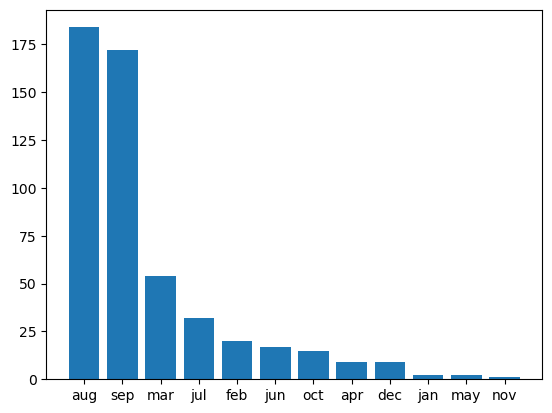

In [32]:
plt.bar(month_counts.index, month_counts.values)
plt.show()

Interesting, notice that the majority of our data is focused around August and September. One question we might want to keep asking ourselves as we continue is why is this the case?

Right now it is unclear but maybe this could be related to an increase in the number of fires during these months or perhaps our data is biased and simply more samples where drawn from these two months than the rest.

In [34]:
# TODO 3.2
day_counts = forestfire_df.value_counts(forestfire_df.day)
display(day_counts)

todo_check([
    (np.all(day_counts.values == np.array([95, 85, 84, 74, 64, 61, 54])), 'Month values did not match!')
])

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
dtype: int64

Your code PASSED the code check!


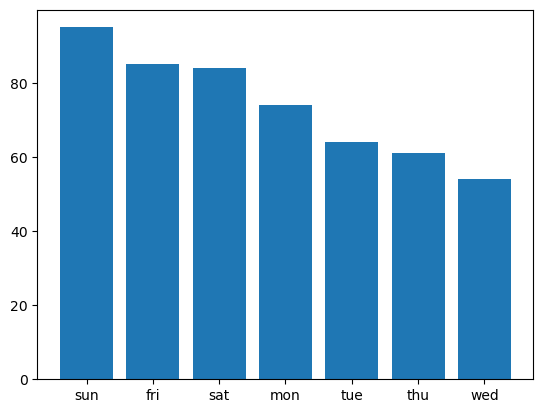

In [35]:
plt.bar(day_counts.index, day_counts.values)
plt.show()

After observing the values for the 'day' feature it is much hard to notice anything that stands out as the days seem randomly distributed.

<hr>

Next, let's further check to make sure our dataset actually has no null or missing values as was reported earlier by the `info` method. If we do have any null or missing values then these will need to be dealt with during our data cleaning phase by filling them or dropping the entire data sample.

#### TODO 4

1. Convert our `forestfire_df` to a boolean DataFrame (here true indicates an element is a missing value) using the Pandas DataFrame `isnull()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)). Store the output into the `forestfire_isnull` variable.

It's hard to see if every single element in our dataset is false. If only there was a easier way. Well, there is! We can use the NumPy function `any()` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.any.html)) to check if every boolean in `forestfire_isnull` is false. In other words, `any()` will only return true if at least one element in `forestfire_isnull` is true.

2. Use the NumPy `any()` function to determine if `forestfire_isnull` has any True values indicating there are null elements in our data. Store the output into the variable `hasnull`.

In [37]:
# TODO 4.1
forestfire_isnull = forestfire_df.isnull()
display(forestfire_isnull)

todo_check([
    (forestfire_isnull.shape == (517,13), "forestfire_isnull shape does not match (517, 13)"),
    (np.all(forestfire_isnull.iloc[10:20, 0].values == np.array([False, False, False, False, False, False, False, False, False,False])) , "The values of forestfire_isnull were incorrect!")
])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


Your code PASSED the code check!


In [41]:
# TODO 4.2
hasnull =np.any(forestfire_isnull)
print(f"Value of hasnull is: {hasnull}")

todo_check([
    (hasnull == False, 'hasnull should be False as there are no null values in the dataset!')
])

Value of hasnull is: False
Your code PASSED the code check!


After passing `forestfire_isnull` to `np.any()` you should see that the function returned False. This means we have no missing data samples so we don't need to fill or remove any data samples at this time.

<hr>

Next up, we need to further checkout our numerical features. The first thing we should look at is the scales of our features. 

Recall, that if the scales of our features are all different then the ML algorithm can have a hard time learning as it will typically assign larger weights to features with larger scales. Doing so will cause the algorithm to value a feature more just because it has a larger scale which isn't what we want.

#### TODO 5
 1. Use the Pandas DataFrame `describe()` method on our `forestfire_df` to get a statistical summary for each of our numerical features.

In [43]:
# TODO 5.1
ff_describe =forestfire_df.describe()
display(ff_describe)

todo_check([
    (ff_describe.shape == (8, 11), 'ff_describe shape did not match (8, 11)'),
    (np.all(np.isclose(ff_describe.values[:4, 2:4].flatten(), np.array([517.        , 517.        ,  90.64468085, 110.87234043,5.52011085,  64.04648225,  18.7       ,   1.1       ]),rtol=.01)), 'The values of ff_describe were wrong!'),
])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Your code PASSED the code check!


Now, how do we know our features are operating on different scales? It's easy, just take a look at the mean for all our features. See how drastically different the mean is for each feature? The 'DC' features has a mean of ~547 while the rain feature has a mean of ~ 0.0216. 

Further, take note of how large the standard deviation or [STD](https://en.wikipedia.org/wiki/Standard_deviation) is for some of our features. If we have a large mean and comparably large STD this isn't bad but if we have a small mean and a very large STD this can cause trouble for learning as our values for that feature will vary drastically. For instance, the area has a small mean and a much large STD. Keep this in mind as we'll investigate this soon.

As a side note, the `describe()` method also gives us the min, max, count, and the [percentiles](https://www.w3schools.com/python/python_ml_percentile.asp).

Finally, let's add scaling the features to our cleaning list. However, note that we **DON'T** usually want to scale our labels as it is [unnecessary](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)! Thus, we'll only want to scale our features.

#### Cleaning List
- Convert 'month' and 'day' features to one-hot encoding (i.e., numerical representations)
- Scale our features using standardization.
<hr>

Now it's time to take a closer look at our label, the 'area' column. Let's start off by visualizing its values. Recall that the 'area' feature has a small mean and large STD so maybe we can gain some insights into why this is.

#### TODO 6

1. Slice the 'area' column using either `iloc`, `loc` or square brackets `[ ]`. Store the output into the variable `area_values`.
2. Plot `area_values` using the Matplotlib `plt.hist()` function. For the `plt.hist()` function all we have to do is pass `area_values` and it will automatically compute the bins our data (bins help to discretize continuous data by breaking the continuous data into discrete groups). Optionally, we could specify the bins. See the [docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for more information.
    1. Note: No TODO check here. Compare your output with the image given below.
<img src="https://live.staticflickr.com/65535/51847213032_ec4eeb59ec_o.png" width="300" height="200" alt="lab-2-6_2-image">
    
3. Call and print the `value_counts()` method from `area_values` to see how many data samples have values near 0. Store the output into the variable `area_value_count`.

In [49]:
# TODO 6.1
area_values = forestfire_df.area
display(area_values)

todo_check([
    (area_values.shape == (517,), 'area_values shape did not match (517,)'),
    (np.all(area_values.values[-10:] == np.array([ 0.  ,  0.  ,  2.17,  0.43,  0.  ,  6.44, 54.29, 11.16,  0.  ,0.  ])), 'area_values did not contain the correct values!')
])

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

Your code PASSED the code check!


Just from the quick printout of the values for `area_values` you should already be noticing lots of zero values. Let's take a closer look by using a bar graph.

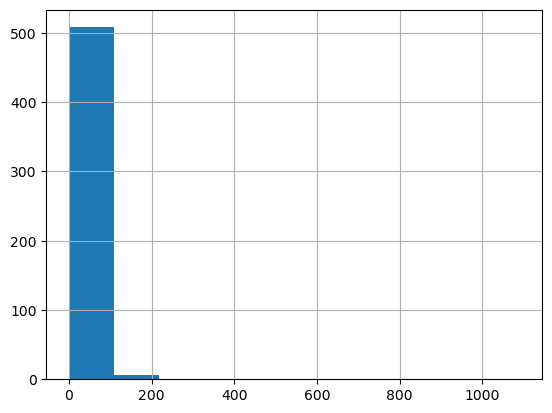

In [55]:
# TODO 6.2
area_values.hist()
plt.show()

Welp, it looks like we found our reasoning for having such a small mean and a larger STD. It looks like majority of our values are located near zero!

In [56]:
# TODO 6.3
area_value_count = area_values.value_counts()
display(area_value_count)

todo_check([
    (area_value_count.shape == (251,), 'area_value_count shape did not match (251,)'),
    (np.all(area_value_count.values[:5] == np.array([247,   3,   2,   2,   2])), 'area_value_count values did not match!')
])

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

Your code PASSED the code check!


Yup, we have exactly 247 data samples with values  equal to 0 and many more very close to 0. When we see a histogram like this it means our data is skewed! 

This can be problematic for us though how problematic is dependent on the ML algorithm and the assumptions said algorithm makes. For instance,  linear regression assumes the normality of residuals/error. Meaning, for linear regression we expect the error (the difference between to prediction and true labels) to be normally distributed but if our labels are skewed this assumption might be violated (maybe more on this next week).

It turns out there is a handy stats trick called the [logarithmic transformation](https://www.r-statistics.com/2013/05/log-transformations-for-skewed-and-wide-distributions-from-practical-data-science-with-r/) where taking the $log$ of a skewed distributions helps to push it towards being more normally distributed. 

We can apply a function to every value in a Pandas DataFrame or Series by using the `apply()` method. Below we apply the `np.log()` function to every value in `area_values`.

Notice, we have to add one to each value in the `area_values` as it is not possible to take the $log$ of zero. Adding one to all data samples circumvents this issue and as long as we add one to ALL data samples things should be fine.

In [57]:
log_area_values = area_values.apply(lambda x: np.log(x+1))
log_area_values

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

Now, let's try plotting `log_area_values`.

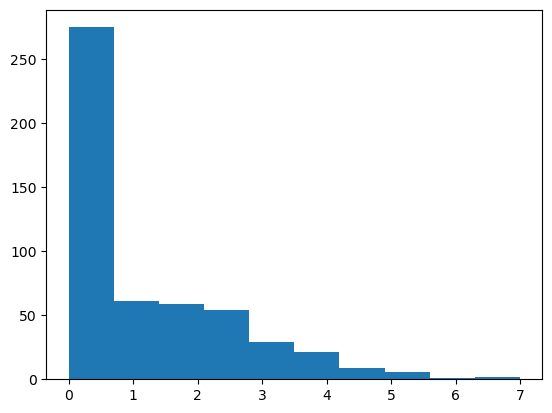

In [58]:
plt.hist(log_area_values)
plt.show()

We can see our value range has shrunk and the differences in values is much more clear. However, the data is still clearly skewed. 

Furthermore, if we take a look at the mean and STD you see the STD is way more in line the the mean now.

In [59]:
log_area_values.describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

Finally, let's add taking the log of our labels 'area' to our cleaning list.

#### Cleaning List
- Convert 'month' and 'day' features to one-hot encoding (i.e., numerical representations)
- Scale our features using standardization.
- Take the log our labels (i.e., 'area') in order to make the values less skewed towards 0.

<hr>

The last visualization and exploration step we'll look at in this lab is observing the correlations between our features.

#### TODO 7
To start off, we can plot each feature against every other feature just to see if there are any trends between features. We can easily do so by using Pandas plotting.

**WARNING: Plotting the scatter matrix can take awhile**

1. Use Panda's `scatter_matrix()` function ([docs](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)) to plot a scatter matrix. Pass `forestfire_df` as input and `figsize=(15, 15)` as an additional argument.
    1. Hint: If you are unfamiliar with passing arguments or keyword arguments in Python see this [tutorial](https://www.w3schools.com/python/gloss_python_function_arguments.asp)
    1. Note: No TODO check here. Check your output with the below image.
<img src="https://live.staticflickr.com/65535/51848198601_b3fc961fd6_o.png" width="400" height="400" alt="lab-2-7_1-image">

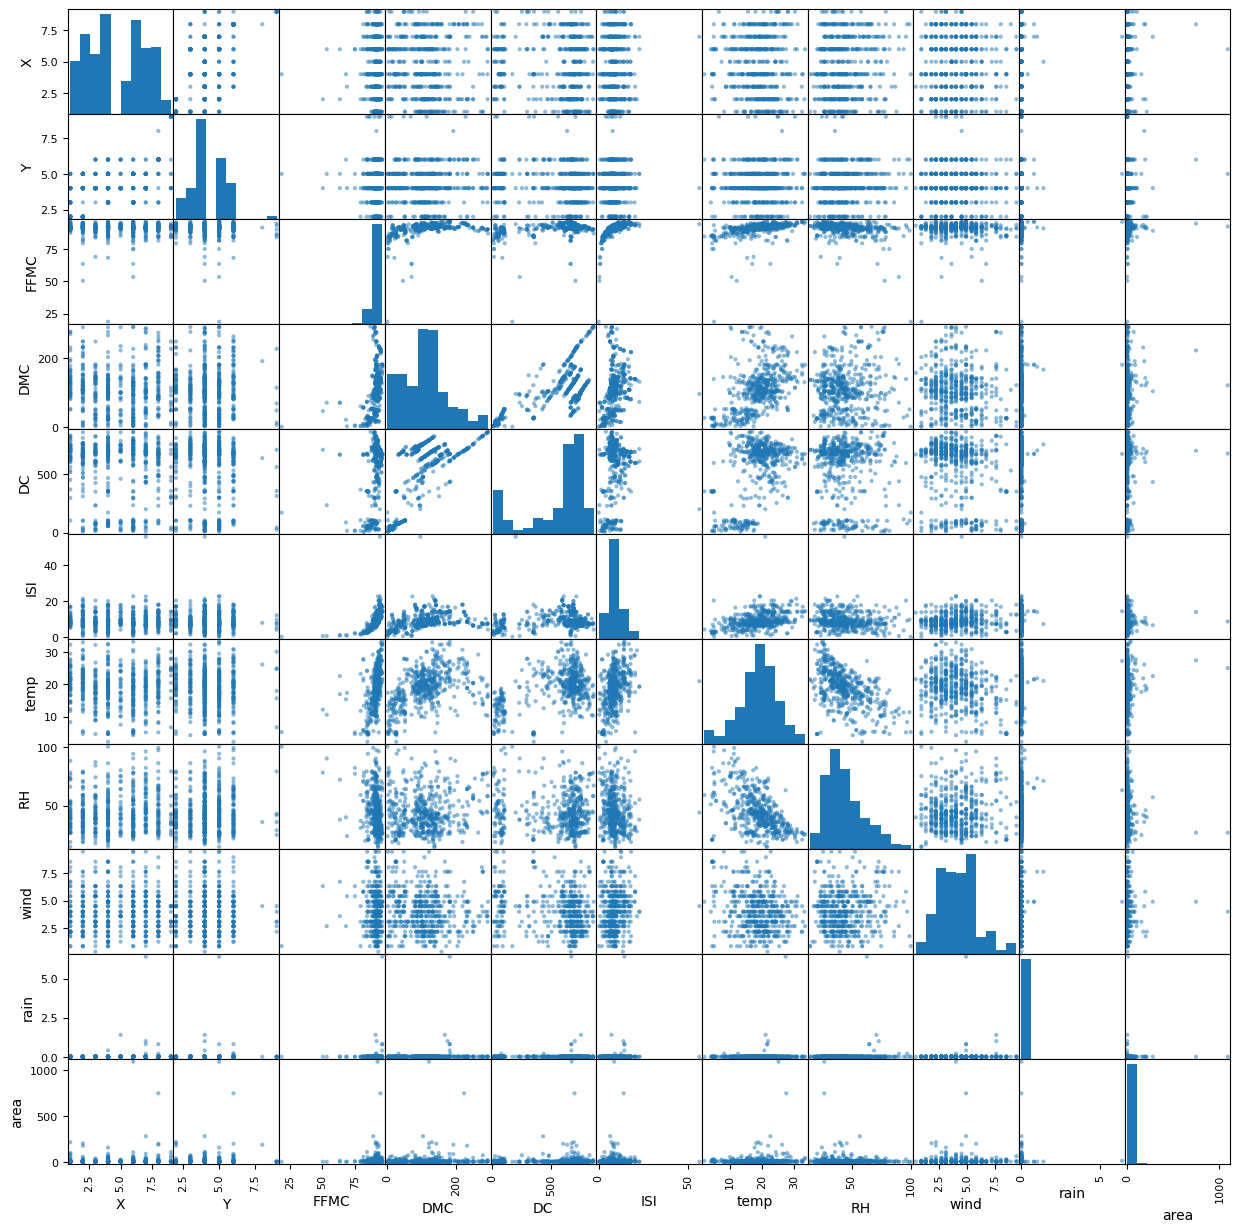

In [66]:
# TODO 7.1
from pandas.plotting import scatter_matrix
scatter_matrix(forestfire_df, figsize=(15,15))
plt.show()

Okay, so what are we looking at? Well, if you read the docs all `scatter_matrix` does is plot each feature against one another. If a feature is plotted against its self then the distribution over all the feature's values is given. For instance, the bottom right corner is the histogram we plotted for 'area' earlier. Also notice that the plot is symmetric. 

Now it's hard to see any patterns, however we can kind of see some linear like trends for feature pairs like 'DMC' and 'DC'. To be fair, this plot isn't proving to be super useful lets try just plotting all our features against our label. This will help us to see if any of our features show any trends or correlations that the ML algorithm might be able to utilize.

Often times we can start to understand which of our features might be useful or important to predicting our labels by observation the correlations between our label and each feature individually. Let's do that using matplotlib [subplots](https://www.w3schools.com/python/matplotlib_subplots.asp). 

**Code Explanation**

Below we split of data into two groups: `X` which contains all our features and `y` which contains our labels (sometimes you'll hear labels referred to as "targets" which implies the same thing as labels).
```python
X = forestfire_df.iloc[:, :-1]
y = log_area_values
```

Next, we loop over just the column names in `X` and add enumerate to get the index position of each column starting from 0. 
```python
for idx, column_name in enumerate(X.columns.values):
```

Inside the loop we call the `plt.subplot()` function which creates an array of plots. The first argument of `subplot` corresponds to how many rows we want in the plot while the second argument corresponds to how many columns we want in the plot. In our case, we have a 3 rows and 4 columns making a 3x4 plot with 12 subplots. Additionally, the argument is the subplot index position which corresponds to plot we are currently plotting to. For instance, index position 1 corresponds to the left most plot whose coordinates are (1,1) while index position 2 corresponds the plot at coordinates (1,2). Thus, position 12 would correspond to the plot at coordinates (3, 4). 
```python
 plt.subplot(3, 4, idx+1)
```

Next, we plot the actual data as a line plot like we saw in last weeks lab.
```python
plt.plot(y, X[column_name], '.')
```

The inner part of the for loop simply adds the x and y labels for each subplot.
```python
plt.ylabel(column_name)
plt.xlabel('Area')
```

Finally, the last line simply auto-spaces our plots to make them neatly spaced.
```python
fig.tight_layout()
```

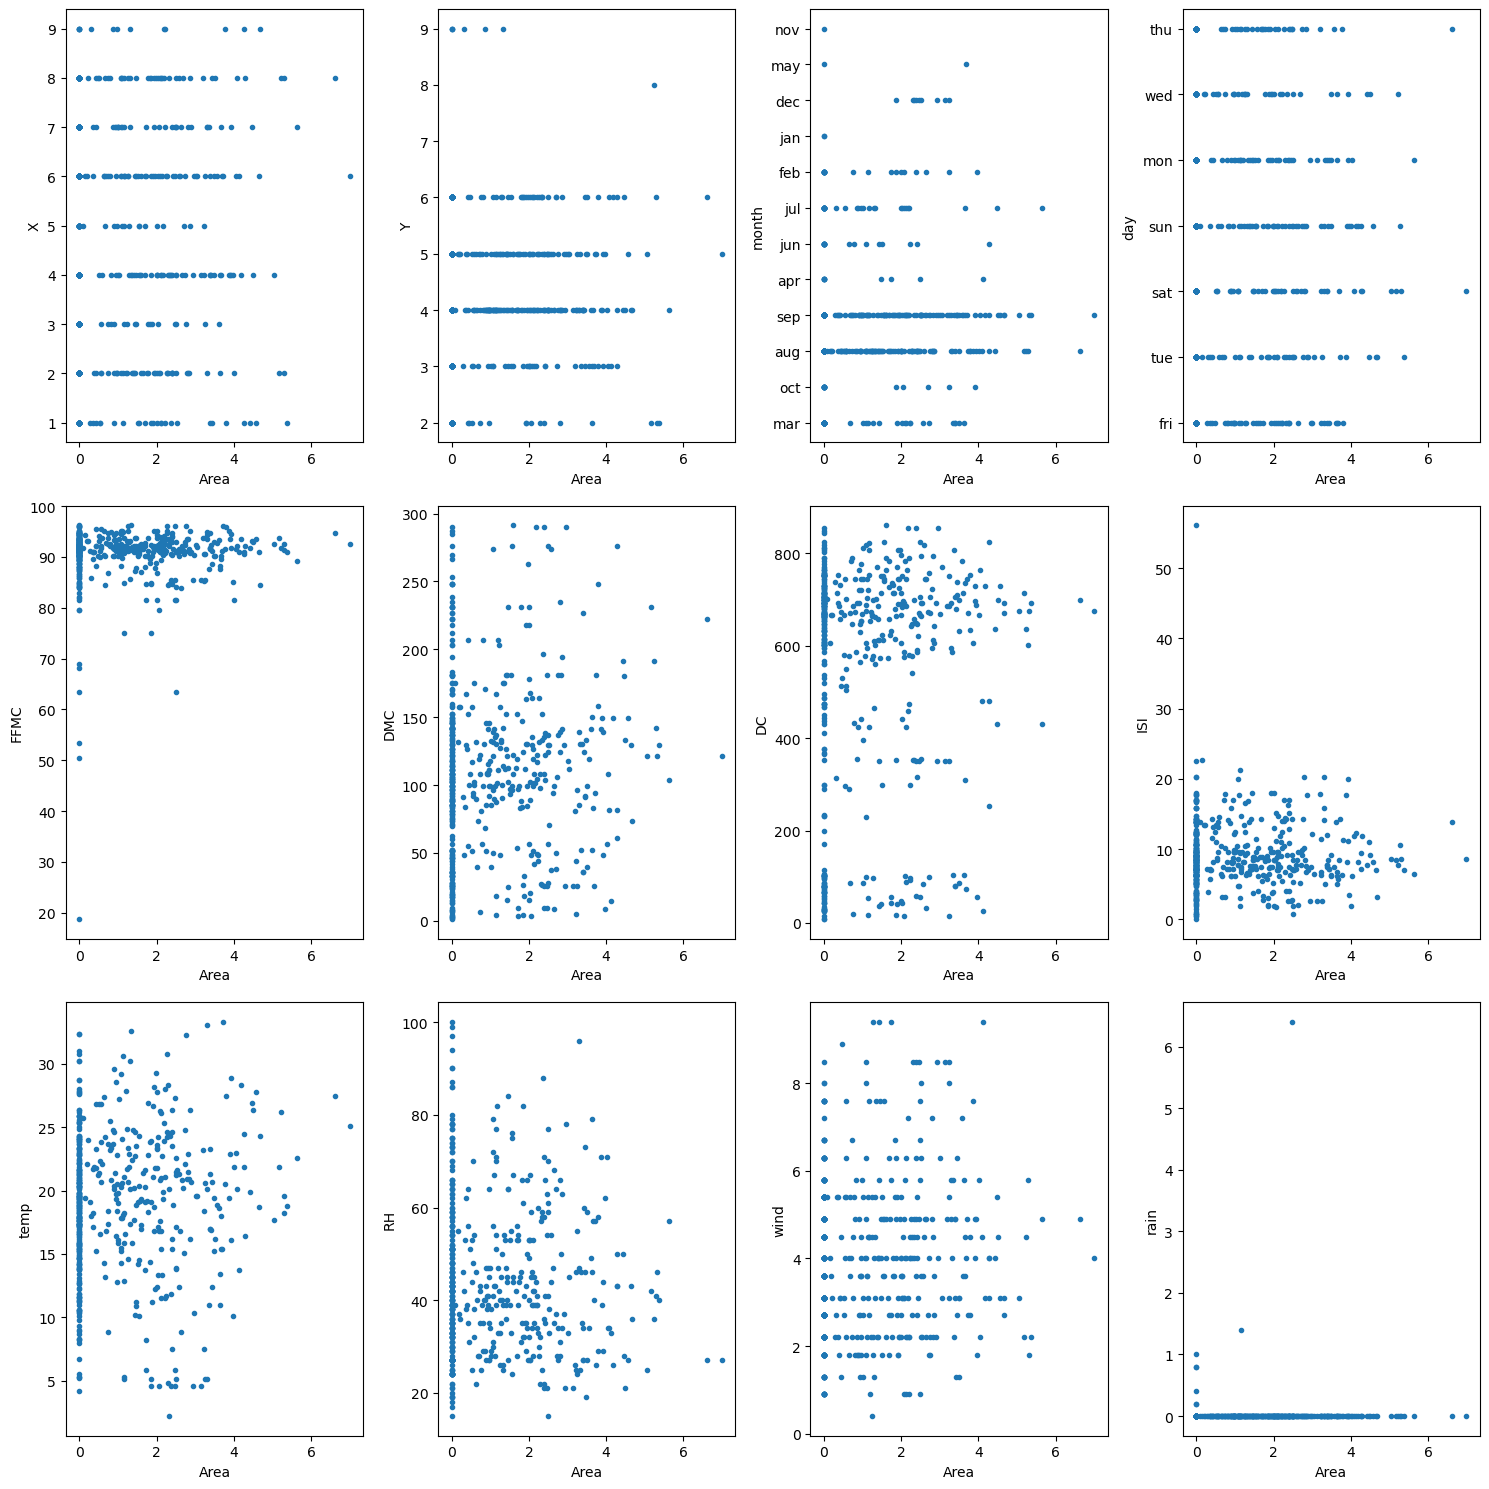

In [67]:
X = forestfire_df.iloc[:, :-1]
y = log_area_values

fig, _ = plt.subplots(figsize=(15, 15))
for idx, column_name in enumerate(X.columns.values):
    # print(idx, column_name)
    plt.subplot(3, 4, idx+1)
    plt.plot(y, X[column_name], '.')
    plt.ylabel(column_name)
    plt.xlabel('Area')
fig.tight_layout()

Given the below picture of what different correlations could look like do you see any? (the numbers above indicate the correlation coefficient)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png)

Hmmm, well, it is looking our features don't have any obvious correlations with our labels when plotted individually. However, do note that we don't typically learn much from features that only take on discrete values like the features 'X', 'Y', 'month' and 'day'. Also, since we still have many data points that have a near zero area (even with the log transform applied), many of the plots contain an almost solid blue line going up the y-axis.

We can confirm that we really aren't seeing any correlations by computing the correlation scores for each pair of features. Recall from statistics that the correlation coefficient ranges from -1 to 1. When close to 1, it means there is a strong positive correlation. Likewise, when close to -1, there is a strong negative correlation. When the correlation is near zero it means there is a very weak or there is no correlation at all.

We use the `corr` method for our `forestfire_df` DataFrame to compute the correlations of all feature pairs. We then access 'area' to view the correlation coefficients of 'area' with all other features. 

In [68]:
corr_matrix = forestfire_df.corr()
corr_matrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [69]:
corr_matrix['area']

X       0.063385
Y       0.044873
FFMC    0.040122
DMC     0.072994
DC      0.049383
ISI     0.008258
temp    0.097844
RH     -0.075519
wind    0.012317
rain   -0.007366
area    1.000000
Name: area, dtype: float64

Given the correlation coefficients we can see 'area' is very weakly correlated with the reset of the features just like we observed. This indicates that this might actually be a harder prediction problem then we originally thought.

That'll wrap up the data exploration for now. Let's move onto data cleaning!

# Cleaning, transforming and splitting data

Finally, we need to actually clean and split our data. These two steps are usually quite integrated with one another as some cleaning steps need be applied for we split our data while others need to be applied after we split the data!
 
Recall we ended the exploration phase with the following **cleaning list**:

- Convert 'month' and 'day' features to one-hot encoding (i.e., numerical representations)
- Scale our features using standardization.
- Take the log our labels (i.e., 'area') in order to make the values less skewed towards 0.

It turns out we can actually apply the following two steps before we split our data (though you could also apply them after if you so wish):

- Convert 'month' and 'day' features to one-hot encoding (i.e., numerical representations)
- Take the log our labels (i.e., 'area') in order to make the values less skewed towards 0.

However, scaling typically requires our data be split first. This is because scaling (and some other transformations) require extracting statistical information (like the mean and standard deviation) from **ONLY** the training set. Once this information is extracted from the dataset it is used to transform the training data and testing data. Including the testing data when extracting statistical information like the mean and standard deviation is considered bad practice as the test information should be unknown as it is simulating unseen data! Thus, the following step will be applied separately after splitting:

- Scale our features using standardization.


This section will thus be structured as follows:

1. First, we need to apply any data cleaning and transformation steps that can be applied before splitting our data. Meaning, we can safely apply these cleaning operations to our entire dataset.
2. Next, we need to split our data into input features and labels. Once this is done, we need to split our data into two sets: training and testing
3. Finally, we need to apply any remaining data cleaning and transformation operations to our train and test sets. 

## Cleaning with Sklearn
To implement all our data cleaning we'll be using Sklearn which has a `Pipeline` and `ColumnTransformer` class that makes cleaning our data super easy. **However, our focus will be on the `ColumnTransformer` in this lab.**
Check more details in [Sklearn ColumnTransformer Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).
### Pipeline 
The `Pipeline` class works by applying a list of data cleaning classes to all our columns in the passed dataset. We can define a `Pipeline` by passing a list of tuples as seen below:

```python
pipeline = Pipline([
    ('name', Class()),
    ('another_name', AnotherClass())
])
```

Each tuple in the list is a expected to contain both a name (this name can be anything you want) and a class which applies the data cleaning and transformations.

### ColumnTransformer

The `ColumnTransformer` class works just like the `Pipeline` class, however it provides us with the ability to apply certain data cleaning classes to specific columns in our data. We can define a `ColumnTransformer` by passing a list of tuples as seen below:

```python
full_pipeline = ColumnTransformer([
    ('name', Class(), ['feature_name_1', 'feature_name_2']),
    ('another_name', AnotherClass(), ['feature_name_3'])
])
```

The main difference now is that each tuple has now has three elements. The first element is a name (which we can call anything), just like before. The second element is still a class instance which applies the data cleaning and transformations. However, now, the third element is the name of features/columns we want to use for that pipeline. 

For instance, when we apply the one-hot transformation we want to only apply it to the 'month' and 'day' features. Likewise, when we apply the log transform we want to only apply the transform only to our 'area' feature which is our label.


### Creating our own data cleaning classes

Now, in order to use the `Pipeline` and `ColumnTransformer` we need program our data cleaning and transformation operations into Python classes. These cleaning/transformation classes must have two methods: `fit()` and `transform()` which do the following:

1. `fit()` - This method is used to extract information from the passed data and sets any class variables which will be used by the `transform()` method.
2. `transform()` - This method actually applies our data cleaning and transformations to the passed data.

If these methods are not defined by a class that is passed to either `Pipeline` or `ColumnTransformer` then an error will be thrown.

Additionally, when we create our data cleaning classes we'll inherit from the Sklearn `TransformerMixin` class which provides us with additional methods such as `fit_transform()`. The `fit_transform()` method allows us to automatically run both the `fit()` and `transform()` methods instead of calling them separately. Further, you'll often see people inherit from `BaseEstimator` to get access to some other handy methods for hyperparamter tuning but this is out-of-scope for this lab.

When a pipeline is ran using `pipeline.fit_transform(data)`, all the data cleaning and transformation classes in the pipeline will be applied to our `data` sequentially. All we need to do then is make a class for each step in our cleaning list and then create an instances of the `Pipeline` and `ColumnTransformer` classes. 

Take a second to process this information as it might sound little more confusing at first.
<hr>

First, let's import the class we need from Sklearn. We import both the `BaseEstimator` and `TransformerMixin` classes as well inherit from them to gain some extra functionality. While we won't be able to show off this functionality it'll be good to practice Python inheritance. 

Next, we import the `Pipeline` and `ColumnTransformer`. Here the `ColumnTransformer` works just like `Pipeline` but it allows us to specify which columns in our DataFrame should be used in a particular transformations. For instance, recall that we don't usually want to standardize or normalize our labels (i.e., the 'area' column), thus we can use the `ColumnTransformer` to make sure the scaling isn't applied to our 'area' column!

In [70]:
import sklearn
# Check to make sure you have the right version of sklearn
assert sklearn.__version__  >= '1.0.1', f'sklearn version is only {sklearn.__version__} and needs to be >= 1.0.1'

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Before splitting: data cleaning and transforming
Let's start off by creating the data cleaning classes that can be applied before we need to split our data!

### One-hot encoding

Let's look at transforming our categorical features into numerical features first. Recall, we can do this by converting our categorical or textual data into what we call one-hot encodings or indicator variables. 

We could naively just convert our categorical data into numbers, however if our data is not ordinal then this method won't really make any sense. For instance, let's assume we have the inputs of cat or dog. Is it then reasonable to assign 0 to cat and 1 to dog? Can we say that dog $>$ cat as 1 $>$ 0? No, we can't. For this reason, we convert the categorical values to indicator variables or one-hot encodings. Instead of 1 or 2 for cat or dog, we use vector representations. For instance, `[1, 0]` could be for cat and `[0, 1]` could be for dog. 

#### TODO 8

1. Use Pandas `get_dummies()` function and pass `forestfire_df` to it to convert all the categorical features to one-hot encodings. Store the output into the variable `one_hot_df`.
2. Get the shape of `one_hot_df` to see how many new columns/features were added due to the one-hot encoding. Store the output into the variable `one_hot_df_shape`.

In [73]:
# TODO 8.1
one_hot_df = pd.get_dummies(forestfire_df)
display(one_hot_df)

todo_check([
    (one_hot_df.shape == (517, 30),'one_hot_df shape did not match (517, 30)'),
    ('month_nov' in one_hot_df.columns, 'month_nov not detected in column names!'),
    ('day_fri' in one_hot_df.columns, 'day_fri not detected in column names!'),
])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


Your code PASSED the code check!


In [78]:
# TODO 8.2
one_hot_df_shape =one_hot_df.shape
print(f"Shape of one_hot_df is: {one_hot_df_shape}")

todo_check([
    (one_hot_df_shape == (517, 30), 'one_hot_df shape did not match (517, 30)')
])

Shape of one_hot_df is: (517, 30)
Your code PASSED the code check!


You should see that we know have 30 features! The one-hot encoding has taken us from 13 to 30 features meaning it has added 19 new features to our data. Recall 'month' and 'day' are removed in favor of the 19 new features where 11 + 19 = 30.

#### TODO 9
Now let's wrap our one-hot code in a class that can be used with Sklearn's pipeline functionality. Finish the `OneHotEncoding` class which produces one-hot encodings and stores the columns names of the newly generated one-hot for reference later.

1. In the `transform()` method, convert the input `X` into one-hot encodings using `pd.get_dummies()`. Store the output into the variable `one_hot`. It's similar to what you did in *TODO 8*. 
2. Store the names of the columns for our one-hot encoding `one_hot` so we can access them later if needed. Store the output into the class variable `self.feature_names`
    1. Think about how you access the columns of a DataFrame!
    
*Note: when you see an argument defined as `X: pd.DataFrame` anything following the colon up to the next argument is used as documentation to indicate to the programmer what type this argument should be receiving. For instance, we would say that `X` is expected to receive a `pd.DataFrame` as input. Doing so is called [type hinting](https://docs.python.org/3/library/typing.html).*

In [85]:
class OneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = None
    
    def fit(self, X: pd.DataFrame, y: pd.DataFrame = None):
        # We don't need to set/learn any variables so
        # we just need to return a reference to the object with 'self'
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None):
        # TODO 9.1
        one_hot = pd.get_dummies(X)
        
        # TODO 9.2
        self.feature_names =one_hot.columns
        
        return one_hot

Once you finished the class, run the below code to test out your `OneHotEncoding` class. For future reference, sklearn actually has its own `sklearn.preprocessing.OneHotEncoder` class ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)) which can save you from writing your own class like we did above but it will not return a Pandas DataFrame! 

In [86]:
one_hot = OneHotEncoding()
ohe_df = one_hot.fit_transform(forestfire_df[['month', 'day']])
display(ohe_df)

todo_check([
    (ohe_df.shape == (517, 19),'ohe_df shape did not match (517, 19)'),
    ('month_nov' in ohe_df.columns, 'month_nov not detected in column names!'),
    ('day_fri' in ohe_df.columns, 'day_fri not detected in column names!'),
    ('month_nov' in one_hot.feature_names, 'self.feature_names does not contain the right column name values!'),
])

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Your code PASSED the code check!


### Log transformation

Our next data cleaning and transformation class we need to code is the log transformation which will be applied to our labels (i.e., the 'area' column). 

#### TODO 10
Now it's your turn to define an entire class. Complete the TODO by creating the `LogTransformer` class.

1. Define the `LogTransformer` class by following the below steps:
    1. Create a class called `LogTransformer`. Make sure this class inherits `BaseEstimator` and `TransformerMixin`.
        1. Note: as we don't need the constructor method `__init__()` we don't have to define it. 
    3. Define the `fit()` method. Be sure it takes the arguments `self`, `X`, and `y=None` just like we did above. Further, make sure to return `self` otherwise you will get errors.
    4. Define the `transform()` method which takes the arguments `self`, `X`, and `y=None` just like we did above.
    5. In the `transform()` method, return the log of the input data `X`. *Be sure you add 1 to the data before computing the log* as it is not possible to take $log(0)$!

In [88]:
# TODO 10.1
class LogTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X: pd.DataFrame, y: pd.DataFrame = None):
        # We don't need to set/learn any variables so
        # we just need to return a reference to the object with 'self'
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None):
        return np.log(X+1)

Once you think you have completed the class try running the below code which will check your implementation by applying the log to the 'area' feature. 

In [89]:
log = LogTransformer()
log_area_df = log.fit_transform(forestfire_df['area'])
display(log_area_df)

todo_check([
    (log_area_df.shape == (517,), 'log_area_df does not have the shape (517,)'),
    (np.all(np.isclose(log_area_df.values[-5:], np.array([2.00687085, 4.01259206, 2.49815188, 0.        , 0.        ]),rtol=.01)), 'log_area_df did not contain the correct values!')
])

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

Your code PASSED the code check!


If the class is correct, we should get the same histogram as before!

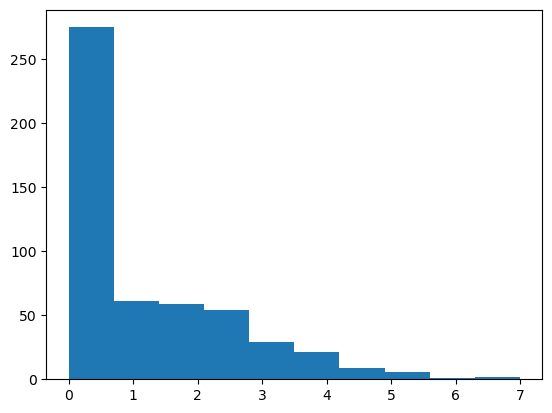

In [90]:
plt.hist(log_area_df)
plt.show()

### Building the ColumnTransformer

Now we can finally build a pipeline using the `ColumnTransformer`. Recall that we can define a `ColumnTransformer` as follows:

```python
column_pipeline = ColumnTransformer([
    ('name', Class(), ['feature_name_1', 'feature_name_2']),
    ('another_name', AnotherClass(), ['feature_name_4'])
])
```

Notice it takes a list of tuples. Each element of the list corresponds to a new data transformation while each element of the tuples corresponds to the following:

1. The first element is a name (which we can call anything). 
2. The second element is still a class instance which applies the data cleaning and transformations.
3. The third element is the name of features/columns we want to use for that pipeline. 

Below, we create a `ColumnTransformer` and specify a list that contains our different data clean and transformation operations. *Take a second to review the code, you'll need to do something similar soon!*

In [91]:
stages = [
    ('one_hot',  OneHotEncoding(), ['month', 'day']),
    ('log', LogTransformer(), ['area']),
]

before_pipe = ColumnTransformer(stages, remainder='passthrough',)

Or, you can combine the two lines into a single line:

In [92]:
before_pipe = ColumnTransformer([
    ('one_hot',  OneHotEncoding(), ['month', 'day']),
    ('log', LogTransformer(), ['area']),
], remainder='passthrough',)

We can run `before_pip` by calling `fit_transform` which will run our list of transformation operations sequentially. Additionally, it will call both the `fit()` and `transform()` methods for each our transformation classes.

In [93]:
clean_array = before_pipe.fit_transform(forestfire_df)
clean_array

array([[ 0. ,  0. ,  0. , ..., 51. ,  6.7,  0. ],
       [ 0. ,  0. ,  0. , ..., 33. ,  0.9,  0. ],
       [ 0. ,  0. ,  0. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 0. ,  1. ,  0. , ..., 70. ,  6.7,  0. ],
       [ 0. ,  1. ,  0. , ..., 42. ,  4. ,  0. ],
       [ 0. ,  0. ,  0. , ..., 31. ,  4.5,  0. ]])

In [94]:
type(clean_array)

numpy.ndarray

As you can see, we get back a NumPy array instead of a DataFrame. This is one downside to using `Pipeline` and `ColumnTransformer`. Since we don't have column labels anymore how do we know what each column represents? We have no clue, right? Not quite. 

Luckily, the `Pipeline` and `ColumnTransformer` work by constructing the array output `clean_array` in the same order as our list `stages` specifies them. For instance, since `OneHotEncoding` is the first data cleaning class in the list, it gets applied first. This means that the first 19 columns of `clean_array` will be the newly generated one-hot encodings. Further, since we apply `LogTransformer` next, the 'area' column is put directly after the one-hot encodings. Lastly, since we passed the keyword argument `remainder='passthrough'`, the remaining columns which were not specified in our `stages` list are tacked onto the end. 

With this knowledge, we can easily reconstruct a new DataFrame after cleaning and applying our transformations.

Recall that the `OneHotEncoding` coverts the 'month' and 'day' features into 19 new features. How do we get these newly generated feature names? 

Welp, with a little foresight we actually already added a class variable called `self.feature_names` to the `OneHotEncoding` class which stores the 19 new column/feature names for us. The next question is how do we access this class variable? Well, we can do so using the `before_pipe` instance which contains the instance of our `OneHotEncoding` class. We have to do a little navigating to find our `OneHotEncoding` instance, as seen by the below code, but find it we can.

Below are the steps in how we found our `OneHotEncoding` instance.

In [95]:
before_pipe.transformers_

[('one_hot', OneHotEncoding(), ['month', 'day']),
 ('log', LogTransformer(), ['area']),
 ('remainder', 'passthrough', [0, 1, 4, 5, 6, 7, 8, 9, 10, 11])]

In [96]:
before_pipe.transformers_[0]

('one_hot', OneHotEncoding(), ['month', 'day'])

In [97]:
before_pipe.transformers_[0][1]

OneHotEncoding()

In [98]:
cat_feature_names = before_pipe.transformers_[0][1].feature_names
cat_feature_names

Index(['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

Next, we can extract all the old column names that weren't utilized by the `ColumnTransformer`.

In [99]:
old_feature_names = forestfire_df.drop(['area', 'month', 'day'], axis=1).columns
old_feature_names

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], dtype='object')

All we have to do now is combine the column names in the same order that the `before_pipe` applied the transformations.

In [100]:
new_feature_names = list(cat_feature_names) + ['area'] + list(old_feature_names)
new_feature_names

['month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_fri',
 'day_mon',
 'day_sat',
 'day_sun',
 'day_thu',
 'day_tue',
 'day_wed',
 'area',
 'X',
 'Y',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain']

In [101]:
clean_df = pd.DataFrame(clean_array, columns=new_feature_names)
clean_df

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,6.0,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0
513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0
514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0


And there we go! We have now have our forest fire data back intact and in a DataFrame! That being said the columns are in a different order but that's only a small inconvenience. 

If this part was confusing for you be sure to take a second and ask any questions you have.

## Splitting the data
Now, before we can get to the standardization step we first need to split our labels from the rest of the features and to split our dataset into two sets: training and testing. 

### Splitting into labels and features

Later in the course we'll find that we will want to predict a given feature, recall we refer to the feature we want to predict as our "label" or "target". The remaining features in our data will acts as our input data to predict the labels. Thus, it can be useful to split our input features and labels into two different variables. Typically we use the variable `y` to store our labels/targets and `X` to store our input features.

#### TODO 11
 Using the `clean_df` split our columns into features and labels.
 
 1. Index/slice our label 'area' and store the output into the variable `y`.
 2. Index/slice all other features **EXCEPT 'area'** into the variable `X`. To do so you can use the Pandas DataFrame `drop()` method or slicing with `iloc`, `loc` or `[ ]`.

In [107]:
# TODO 11.1
y = clean_df['area']
display(y)

todo_check([
    (y.shape == (517,), 'y does not have the correct shape of (517,)'),
    (np.all(np.isclose(y.values[-5:], np.array([2.00687085, 4.01259206, 2.49815188, 0.        , 0.        ]),rtol=.01)),'y has the incorrect values'),
])

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

Your code PASSED the code check!


In [109]:
# TODO 11.2
X = clean_df.drop(columns="area")
display(X)

todo_check([
    (X.shape == (517, 29), 'X does not have the correct shape of (517, 29)! Make sure the `area` column is not included!'),
    (np.all(np.isclose(X.values[-5:, -4], np.array([27.8, 21.9, 21.2, 25.6, 11.8]),rtol=.01)),'X has the incorrect values'),
])

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,6.0,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0
513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0
514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0


Your code PASSED the code check!


### Splitting into train and test sets

Next we need to split our input data `X` and labels `y` into train and test sets. Recall, the train set is used to train our ML algorithm while the test set acts as unseen data. The test set is used to assess how well the ML algorithm will generalize to unseen data, otherwise know as measuring generalization or test error.

An easy way to create a train and test split is to use sklearns `train_test_split` function.

In [110]:
from sklearn.model_selection import train_test_split

#### TODO 12
Let's now split our input data `X` and labels `y` into a train and test set using the `train_test_split()` function ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Here we'll use the 80-20 split rule where we use 80% of the data for training and 20% for testing. Lastly, we'll seed our split using the `random_state` keyword argument which will make sure we create the same split every time we run the function.

1. Use the `train_test_split()` function to get a train and test split. Store the output into `X_train`, `X_test`, `y_train`, and `y_test`.
    1. Pass the required arguments `X` and `y`. 
    2. Further specify we want to use 20% of the training data by setting the `test_size` keyword argument. 
    3. Lastly, pass the keyword argument `random_state=42` to set the random seed so we get the same split every time we run this code. 
2. Print the shape for `X_train`.
3. Print the shape for `y_train`.
4. Print the shape for `X_test`.
5. Print the shape for `y_test`.

In [112]:
# TODO 12.1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

todo_check([
    (X_train.shape == (413, 29), 'X_train does not have the correct shape (413, 29)'),
    (X_test.shape == (104, 29), 'X_test does not have the correct shape (104, 29)'),
    (y_train.shape == (413,), 'y_train does not have the correct shape (413,)'),
    (y_test.shape == (104,), 'y_test does not have the correct shape (104,)'),
    (np.all(np.isclose(X_train.values[-5:, -4], np.array([17.7, 18.2, 21.8, 23.8, 20.1]),rtol=.01)), 'X_train does not contain the correct values! Make sure you used `X` when splitting!'),
    (np.all(np.isclose(y_test.values[-5:], np.array([1.25561604, 1.8531681 , 1.15373159, 4.01259206, 3.56558124]),rtol=.01)), 'y_test does not have the correct values! Make sure you used `y` when splitting!')
])


Your code PASSED the code check!


Check to see if you split the data correct you should get 413 data samples for `X_train` and `y_train`. Furthermore, you should get 104 samples for `X_test` and `y_test` as seen below.

In [113]:
# TODO 12.2
print(X_train.shape)

(413, 29)


In [114]:
# TODO 12.3
print(y_train.shape)

(413,)


In [52]:
# TODO 12.4
print(X_test.shape)

(104, 29)

In [115]:
# TODO 12.5
print(y_test.shape)

(104,)


## After splitting: more data cleaning and transforming

### Scaling with standardization

Finally, let's create a standardization class which will scale all our numerical features. Recall that standardization transforms our data to have a zero mean and a standard deviation (STD) of 1 (i.e., unit variance). When standardizing our data we simply subtract each feature by its mean and divide by its STD. 

For instance, if we wanted to standardize the 'rain' feature we would subtract the mean of the 'rain' column from every value in the 'rain' column. Then, we would divide all values in the 'rain' column by the STD of the 'rain' column. See the equation below.

$$
\frac{rain - mean(rain)}{STD(rain)}
$$

We can generalize these computations to every column for any given matrix `X` thanks to linear algebra and NumPy. To calculate the mean and STD we simply input the `X` into the NumPy functions `np.mean()` and `np.std()`. We then have to specify the 'axis' parameter within these functions so that the mean and STD are computer per column. If `axis=0` then we are looking to compute the `np.mean()` and `np.std()` for each **column**. Likewise, if `axis=1`then we are looking to compute the `np.mean()` and `np.std()` for each **row**. 

The general formula is given below where $X$ is our dataset, $\vec{\mu}$ is a vector of means for each column, and $\vec{\sigma}$ is a vector of standard deviations for each column.

$$
\frac{X - \vec{\mu}}{\vec{\sigma}}
$$


*Note: we could just as easily decided to do normalization like MinMax scaling. In practice, it might be worth trying. Due to time constraints, we will save practicing how to normalize data for another day.*

#### TODO 13
 
 Complete the following `Standardization` class. Recall that we want to compute the mean and STD for each column! Think about what value we need to set the 'axis' argument equal to in order to achieve this.
 
1. In the `fit()` method, compute the mean of the input `X` using `np.mean()`. Store the output into the variable `self.mean`.
 
1. In the `fit()` method, compute the STD of the input `X` using `np.std()`. Store the output into the variable `self.std`.
 
1. In the `transform()` method, compute and return the standardization for the input `X`. In other words, convert the standardization general 
formula into code and return the output.

In [122]:
class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        # TODO 13.1
        self.mean = np.mean(X)
        # TODO 13.2
        self.std = np.std(X)
        # Always return self
        return self
    
    def transform(self, X):
        # TODO 13.3
        
        return (X-self.mean)/(self.std)

Once you think you have completed the class try running the below code which will scale only our numerical features (numerical features start at index 19). 

For future reference, sklearn actually has its own `sklearn.preprocessing.StandardScaler` class ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) which can save you from writing your own class like we did above (note it will not return a Pandas DataFrame like ours though)! 

In [123]:
scale = Standardization()
scaled_df = scale.fit_transform(X_train.iloc[:, 19:])
display(scaled_df)

todo_check([
    (scaled_df.shape == (413, 10), 'scaled_df does not have the right shape of (413, 10)'),
    (np.all(np.isclose(scaled_df.values[0, [1, -1]], np.array([-1.09485913, -0.06781709]),rtol=.01)), 'scaled_df does not contain the correct values!'),
    (np.all(np.isclose(scale.transform(X_test.iloc[:, 19:].mean()).values, np.array([ 0.01785169, -0.0915082 ,  0.09302418, -0.09879271, -0.03740731,0.31735123,  0.00172016, -0.0798864 ,  0.05723329, -0.00198524]),rtol=.01)), 'Incorrect results when computing the scaled values for X_test. Make sure your transform() method is correct!')

])

C:\Users\himat\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,-0.288472,-1.094859,0.280286,-0.150282,0.810272,-0.095838,0.797602,-1.059419,0.001631,-0.067817
173,-0.288472,-0.266696,0.061652,0.217866,0.549136,-0.455434,-0.205272,-0.335215,-1.008923,-0.067817
272,-1.161285,0.561466,0.263468,0.614919,0.435442,1.419602,0.227001,0.147588,0.001631,-0.067817
497,-0.724878,-0.266696,0.936186,1.048482,0.487669,1.419602,2.319206,-1.059419,-1.008923,-0.067817
182,0.147934,-0.266696,-0.627884,-1.469227,-2.014816,-1.251682,-1.121692,0.509690,-1.008923,-0.067817
...,...,...,...,...,...,...,...,...,...,...
71,-0.288472,0.561466,0.633463,-0.411941,0.572437,1.830569,-0.205272,-0.455916,-0.222936,-0.067817
106,-0.288472,0.561466,0.145742,-1.239514,-1.910361,-0.327007,-0.118818,-0.938719,-0.503646,-0.067817
270,-1.161285,-1.923022,0.263468,0.614919,0.435442,1.419602,0.503656,0.690741,-0.503646,-0.067817
435,-1.161285,0.561466,0.044834,-0.418026,-0.695879,-0.815030,0.849475,0.388990,-1.233490,-0.067817


Your code PASSED the code check!


We can further check to make sure our scaler class is working by using the `describe()` method. Notice, all our means are very close to 0 and all the STDs are very close to 1.

In [124]:
scaled_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02
mean,-2.182811e-16,-4.139815e-17,2.168725e-14,-3.598984e-16,-2.313457e-15,2.043025e-16,2.027300e-15,1.629044e-16,-9.737763e-17,1.139793e-16
std,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00
min,-1.597691e+00,-1.923022e+00,-1.208091e+01,-1.689811e+00,-2.177122e+00,-2.253414e+00,-2.885369e+00,-1.783624e+00,-1.738767e+00,-6.781709e-02
25%,-7.248784e-01,-2.666965e-01,-5.607340e-02,-6.294833e-01,-4.504113e-01,-6.095469e-01,-5.856732e-01,-7.576675e-01,-7.282131e-01,-6.781709e-02
50%,-2.884720e-01,-2.666965e-01,1.793779e-01,-5.748427e-02,4.607517e-01,-9.583835e-02,3.680082e-02,-1.541638e-01,1.631241e-03,-6.781709e-02
75%,1.020747e+00,5.614662e-01,3.980112e-01,4.597489e-01,6.640359e-01,4.692410e-01,6.765658e-01,5.096903e-01,7.876175e-01,-6.781709e-02
max,1.893560e+00,3.874117e+00,9.530035e-01,2.724926e+00,1.248578e+00,3.577177e+00,2.492115e+00,3.346158e+00,3.033293e+00,1.984931e+01


### Building the ColumnTransformer

It's time to build our `ColumnTransformer` pipeline for our training and testing data now. 

Now, when we apply standardization or normalization sometimes it is desirable to scale our categorical one-hot encodings and sometimes it isn't. Most of the time we'd want to apply standardization to our one-hot encodings to prevent the one-hot features from getting assigned higher weights simply due to them having a higher scale. Sometimes this isn't needed as it depends on the ML algorithm you are using. However, this is an open problem that still remains unclear at times.

- References: When to standardize categorical features
    - [Standardization before or after categorical encoding?](https://stackoverflow.com/questions/47272033/standardization-before-or-after-categorical-encoding)

**Standardizing all features**

First, let's review how standardize all the features in our `X_train` and `X_test` data.

#### TODO 14

Define an instance of the Sklearn `ColumnTransformer` class that will apply our `Standardization` class to ALL our features for `X_train` and `X_test`.

1. Define an instance of sklean's `ColumnTransformer` class which takes a list of tuples. Since we only have 1 data transformation our list will only have 1 tuple. Define the tuple as follows:
    2. In the first element provide the string 'scaler' which will act as the name for this transformation stage.
    3. In the second element of the tuple pass an **instance** of the `Standardization` class (as you wrote in *TODO 13*).
    4. In the third element pass the column names of `X_train`. Recall, DataFrame has a class that stores the names of the columns called `columns`. 
    5. Store the output into the variable `after_pipe`.
2. Using `after_pipe` call the `fit_transform()` method and pass our train data `X_train`. Store the output into the variable `X_train_scaled`.
3. Using `after_pipe` call the `transform()` method and pass our test data `X_test`. Store the output into the variable `X_test_scaled_df`.

In [125]:
# TODO 14.1
after_pipe = ColumnTransformer([('scalar', Standardization(), X_train.columns)])

todo_check([
    (isinstance(after_pipe.transformers, list), 'after_pipe did not recieve input arguments as a list'),
    (isinstance(after_pipe.transformers[0], tuple), 'after_pipe did not recieve tuples as elements inside the list.'),
    (isinstance(after_pipe.transformers[0][1], Standardization), 'after_pipe does not seem to contain the Standardization class!'),
    (np.all(after_pipe.transformers[0][-1] == X_train.columns), 'after_pipe did not recieve the correct column names! Make sure the 3rd element of the tuple contains ALL the column names from X_train!')
])

Your code PASSED the code check!


In [127]:
# TODO 14.2
X_train_scaled = after_pipe.fit_transform(X_train)
print(X_train_scaled)

todo_check([
    (X_train_scaled.shape == (413, 29), 'X_train_scaled shape is not the correct shape of (413, 29)'),
    (np.all(np.isclose(X_train_scaled[1, [1, -1]], np.array([-0.71611487, -0.06781709]),rtol=.01)), 'The values of X_train_scaled were not correct! Make sure you used fit_transform()!'),
])

[[-0.13130643 -0.71611487 -0.1214167  ... -1.05941934  0.00163124
  -0.06781709]
 [-0.13130643 -0.71611487 -0.1214167  ... -0.33521489 -1.00892252
  -0.06781709]
 [-0.13130643  1.396424   -0.1214167  ...  0.14758807  0.00163124
  -0.06781709]
 ...
 [-0.13130643  1.396424   -0.1214167  ...  0.69074141 -0.50364564
  -0.06781709]
 [-0.13130643 -0.71611487 -0.1214167  ...  0.38898956 -1.23349003
  -0.06781709]
 [-0.13130643  1.396424   -0.1214167  ... -0.27486452  0.00163124
  -0.06781709]]
Your code PASSED the code check!


C:\Users\himat\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [129]:
# TODO 14.3
X_test_scaled = after_pipe.transform(X_test)
print(X_test_scaled)

todo_check([
    (X_test_scaled.shape == (104, 29), 'X_test_scaled shape is not the correct shape of (104, 29)'),
    (np.all(np.isclose(X_test_scaled[1, [1, -1]], np.array([1.396424  , 2.42182367]), rtol=.01)), 'The values of X_test_scaled were not correct! Make sure you used transform()!'),
])

[[-0.13130643 -0.71611487 -0.1214167  ...  2.98405549  0.50690812
  -0.06781709]
 [-0.13130643  1.396424   -0.1214167  ...  1.23389475  0.50690812
   2.42182367]
 [-0.13130643  1.396424   -0.1214167  ... -0.9387186  -1.23349003
  -0.06781709]
 ...
 [-0.13130643  1.396424   -0.1214167  ...  1.59599697  2.02273877
   4.28905425]
 [-0.13130643  1.396424   -0.1214167  ...  1.59599697  1.012185
  -0.06781709]
 [-0.13130643 -0.71611487 -0.1214167  ... -0.63696675  1.79817126
  -0.06781709]]
Your code PASSED the code check!


We can easily convert both of these NumPy arrays back into DataFrames as the column order has remained the same!

In [130]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-0.288472,-1.094859,0.280286,-0.150282,0.810272,-0.095838,0.797602,-1.059419,0.001631,-0.067817
1,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-0.288472,-0.266696,0.061652,0.217866,0.549136,-0.455434,-0.205272,-0.335215,-1.008923,-0.067817
2,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-1.161285,0.561466,0.263468,0.614919,0.435442,1.419602,0.227001,0.147588,0.001631,-0.067817
3,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-0.724878,-0.266696,0.936186,1.048482,0.487669,1.419602,2.319206,-1.059419,-1.008923,-0.067817
4,-0.131306,-0.716115,-0.121417,4.68449,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,0.147934,-0.266696,-0.627884,-1.469227,-2.014816,-1.251682,-1.121692,0.509690,-1.008923,-0.067817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-0.288472,0.561466,0.633463,-0.411941,0.572437,1.830569,-0.205272,-0.455916,-0.222936,-0.067817
409,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,2.972092,-0.049266,-0.049266,...,-0.288472,0.561466,0.145742,-1.239514,-1.910361,-0.327007,-0.118818,-0.938719,-0.503646,-0.067817
410,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-1.161285,-1.923022,0.263468,0.614919,0.435442,1.419602,0.503656,0.690741,-0.503646,-0.067817
411,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,3.638871,-0.180278,-0.336463,-0.049266,-0.049266,...,-1.161285,0.561466,0.044834,-0.418026,-0.695879,-0.815030,0.849475,0.388990,-1.233490,-0.067817


In [131]:
X_train_scaled_df.describe()

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,...,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02
mean,5.510792e-18,6.451659e-17,-2.123671e-17,6.330691e-17,1.486906e-16,-3.481208e-17,1.434150e-16,-2.365608e-17,1.486906e-16,2.352167e-16,...,-2.182811e-16,-4.139815e-17,2.168725e-14,-3.598984e-16,-2.313457e-15,2.043025e-16,2.027300e-15,1.629044e-16,-9.737763e-17,1.139793e-16
std,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,...,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00
min,-1.313064e-01,-7.161149e-01,-1.214167e-01,-2.134704e-01,-4.926646e-02,-2.748105e-01,-1.802776e-01,-3.364633e-01,-4.926646e-02,-4.926646e-02,...,-1.597691e+00,-1.923022e+00,-1.208091e+01,-1.689811e+00,-2.177122e+00,-2.253414e+00,-2.885369e+00,-1.783624e+00,-1.738767e+00,-6.781709e-02
25%,-1.313064e-01,-7.161149e-01,-1.214167e-01,-2.134704e-01,-4.926646e-02,-2.748105e-01,-1.802776e-01,-3.364633e-01,-4.926646e-02,-4.926646e-02,...,-7.248784e-01,-2.666965e-01,-5.607340e-02,-6.294833e-01,-4.504113e-01,-6.095469e-01,-5.856732e-01,-7.576675e-01,-7.282131e-01,-6.781709e-02
50%,-1.313064e-01,-7.161149e-01,-1.214167e-01,-2.134704e-01,-4.926646e-02,-2.748105e-01,-1.802776e-01,-3.364633e-01,-4.926646e-02,-4.926646e-02,...,-2.884720e-01,-2.666965e-01,1.793779e-01,-5.748427e-02,4.607517e-01,-9.583835e-02,3.680082e-02,-1.541638e-01,1.631241e-03,-6.781709e-02
75%,-1.313064e-01,1.396424e+00,-1.214167e-01,-2.134704e-01,-4.926646e-02,-2.748105e-01,-1.802776e-01,-3.364633e-01,-4.926646e-02,-4.926646e-02,...,1.020747e+00,5.614662e-01,3.980112e-01,4.597489e-01,6.640359e-01,4.692410e-01,6.765658e-01,5.096903e-01,7.876175e-01,-6.781709e-02
max,7.615773e+00,1.396424e+00,8.236099e+00,4.684490e+00,2.029778e+01,3.638871e+00,5.547002e+00,2.972092e+00,2.029778e+01,2.029778e+01,...,1.893560e+00,3.874117e+00,9.530035e-01,2.724926e+00,1.248578e+00,3.577177e+00,2.492115e+00,3.346158e+00,3.033293e+00,1.984931e+01


In [132]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,20.297783,-0.049266,...,0.584341,0.561466,-0.913789,-1.280589,-1.751671,-1.354424,-1.311893,2.984055,0.506908,-0.067817
1,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,1.020747,0.561466,0.936186,1.048482,0.487669,1.419602,0.469074,1.233895,0.506908,2.421824
2,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,1.457153,1.389629,0.263468,1.442492,0.493293,-0.147209,1.143421,-0.938719,-1.233490,-0.067817
3,-0.131306,-0.716115,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,0.147934,-0.266696,0.633463,-0.411941,0.572437,1.830569,0.209710,0.147588,0.506908,-0.067817
4,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-1.161285,-0.266696,0.667098,0.414111,0.559582,2.883671,1.783186,-0.878368,0.506908,-0.067817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,0.584341,0.561466,0.919368,0.226994,0.083109,1.984681,0.780311,-0.697317,0.282341,-0.067817
100,-0.131306,-0.716115,8.236099,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-0.288472,1.389629,-0.997879,-1.304929,-0.794709,-1.739706,-2.383931,0.992493,0.506908,-0.067817
101,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,0.147934,-0.266696,0.078470,0.832461,0.814691,-0.429749,0.382620,1.595997,2.022739,4.289054
102,-0.131306,1.396424,-0.121417,-0.21347,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-0.049266,...,-1.161285,-0.266696,-1.502417,-0.843983,0.465171,-1.765391,0.520947,1.595997,1.012185,-0.067817


In [133]:
X_test_scaled_df.describe()

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,1.040000e+02,...,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.017676,0.177652,0.119665,-0.119279,0.146378,-0.161916,0.040002,0.045293,0.146378,-4.926646e-02,...,0.017852,-0.091508,0.093024,-0.098793,-0.037407,0.317351,0.001720,-0.079886,0.057233,-0.001985
std,1.069099,1.048749,1.405605,0.675920,1.995192,0.658221,1.106734,1.062155,1.995192,6.972496e-18,...,1.047799,1.086696,0.548660,0.859161,0.982272,1.667332,1.019981,0.918353,1.027773,0.489996
min,-0.131306,-0.716115,-0.121417,-0.213470,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-4.926646e-02,...,-1.597691,-1.923022,-1.855594,-1.651779,-2.171497,-1.791076,-2.470386,-1.542222,-2.019476,-0.067817
25%,-0.131306,-0.716115,-0.121417,-0.213470,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-4.926646e-02,...,-1.161285,-1.094859,-0.030846,-0.849688,-0.352686,-0.545333,-0.585673,-0.697317,-0.728213,-0.067817
50%,-0.131306,-0.716115,-0.121417,-0.213470,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-4.926646e-02,...,0.147934,-0.266696,0.179378,-0.059006,0.390848,-0.057310,0.157837,-0.274865,0.001631,-0.067817
75%,-0.131306,1.396424,-0.121417,-0.213470,-0.049266,-0.274811,-0.180278,-0.336463,-0.049266,-4.926646e-02,...,1.020747,0.561466,0.431647,0.421337,0.579669,0.970107,0.680889,0.388990,0.506908,-0.067817
max,7.615773,1.396424,8.236099,4.684490,20.297783,3.638871,5.547002,2.972092,20.297783,-4.926646e-02,...,1.893560,3.874117,0.936186,2.072299,1.096718,12.156109,1.783186,2.984055,3.033293,4.289054


Notice that the test features means and STD are **not** exactly 0 and 1. This is because we are estimating the mean and STD by using the training set's mean and STD.

We have now standardized all our features for the `X_train` and `X_test` data. 

### Standardizing just numerical features

In the above operation, the months and days are also standardized, which makes no sense as the month and day are supposed to be discrete instead of continous. So, let's try standardizing *only* our numerical features and not the categorical.

#### TODO 15
Complete the definition of `ColumnTransformer` below.
 
1. Finish the below code by **adding a 2nd tuple** which will perform the standardization **only** on the numerical features of our data. Define the tuple by following the below instructions:
    2. In the first element of provide the string 'scaler' which will act as the name for this transformation stage.
    3. In the second element of the tuple pass the **instance** of the `Standardization` class.
    4. In the third element pass the column names of **ONLY** our numerical features using `X_train`. Recall, you'll need to slice the DataFrame starting from 'X' (column 19) and going to 'rain' (the last column)! We printed out the columns names below in case you forgot. 
    5. Store the output into the variable `after_pipe`.

In [134]:
X_train.columns

Index(['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI',
       'temp', 'RH', 'wind', 'rain'],
      dtype='object')

In [151]:
after_pipe = ColumnTransformer([
    ('categorical_pass', 'passthrough', X_train.iloc[:, :19].columns),
    # TODO 15.1
     ('scaler', Standardization(), X_train.iloc[:, 19:].columns)
])

todo_check([
    (isinstance(after_pipe.transformers, list), 'after_pipe did not recieve input arguments as a list'),
    (len(after_pipe.transformers), 'after_pipe list of transformers should have length of 2!'),
    (isinstance(after_pipe.transformers[1], tuple), 'after_pipe did not recieve tuples as elements inside the list.'),
    (isinstance(after_pipe.transformers[1][1], Standardization), 'after_pipe does not seem to contain the Standardization class!'),
    (np.all(after_pipe.transformers[1][-1].values == np.array(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'],dtype=object)), 'after_pipe did not recieve the correct column names! Make sure the 3rd element of the tuple contains ALL the column names from X_train!')
])

Your code PASSED the code check!


In [152]:
X_train_scaled = after_pipe.fit_transform(X_train)
X_train_scaled

C:\Users\himat\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[ 0.        ,  0.        ,  0.        , ..., -1.05941934,
         0.00163124, -0.06781709],
       [ 0.        ,  0.        ,  0.        , ..., -0.33521489,
        -1.00892252, -0.06781709],
       [ 0.        ,  1.        ,  0.        , ...,  0.14758807,
         0.00163124, -0.06781709],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.69074141,
        -0.50364564, -0.06781709],
       [ 0.        ,  0.        ,  0.        , ...,  0.38898956,
        -1.23349003, -0.06781709],
       [ 0.        ,  1.        ,  0.        , ..., -0.27486452,
         0.00163124, -0.06781709]])

If done correctly, you should see that the numerical columns ('X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain') are standardized! 

<!---Also notice that `X_train_scaled` return all our columns and we didn't pass `remainder='passthrough'` when initializing the `ColumnTransformer` class. This is because we passed a placeholder transformation instead. This placeholder transformation does nothing except add any passed columns to the output array `X_train_scaled`. We specify the placeholder by simply adding the string the string "passthrough" to the second element of the tuple inplace of a class. This then takes the first 19 columns (our one-hot encoded columns) and adds them to the output array `X_train_scaled`. So our first 19 columns are end up just being the 19 one-hot encoded columns. Thus the remaining columns are then added through the standardization. --->

In [153]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.288472,-1.094859,0.280286,-0.150282,0.810272,-0.095838,0.797602,-1.059419,0.001631,-0.067817
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.288472,-0.266696,0.061652,0.217866,0.549136,-0.455434,-0.205272,-0.335215,-1.008923,-0.067817
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.161285,0.561466,0.263468,0.614919,0.435442,1.419602,0.227001,0.147588,0.001631,-0.067817
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.724878,-0.266696,0.936186,1.048482,0.487669,1.419602,2.319206,-1.059419,-1.008923,-0.067817
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147934,-0.266696,-0.627884,-1.469227,-2.014816,-1.251682,-1.121692,0.509690,-1.008923,-0.067817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.288472,0.561466,0.633463,-0.411941,0.572437,1.830569,-0.205272,-0.455916,-0.222936,-0.067817
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.288472,0.561466,0.145742,-1.239514,-1.910361,-0.327007,-0.118818,-0.938719,-0.503646,-0.067817
410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.161285,-1.923022,0.263468,0.614919,0.435442,1.419602,0.503656,0.690741,-0.503646,-0.067817
411,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.161285,0.561466,0.044834,-0.418026,-0.695879,-0.815030,0.849475,0.388990,-1.233490,-0.067817


In [154]:
X_train_scaled_df.describe()

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02
mean,0.016949,0.338983,0.014528,0.043584,0.002421,0.070218,0.031477,0.101695,0.002421,0.002421,...,-2.182811e-16,-4.139815e-17,2.168725e-14,-3.598984e-16,-2.313457e-15,2.043025e-16,2.027300e-15,1.629044e-16,-9.737763e-17,1.139793e-16
std,0.129237,0.473938,0.119798,0.204414,0.049207,0.255824,0.174815,0.302613,0.049207,0.049207,...,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00,1.001213e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.597691e+00,-1.923022e+00,-1.208091e+01,-1.689811e+00,-2.177122e+00,-2.253414e+00,-2.885369e+00,-1.783624e+00,-1.738767e+00,-6.781709e-02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.248784e-01,-2.666965e-01,-5.607340e-02,-6.294833e-01,-4.504113e-01,-6.095469e-01,-5.856732e-01,-7.576675e-01,-7.282131e-01,-6.781709e-02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.884720e-01,-2.666965e-01,1.793779e-01,-5.748427e-02,4.607517e-01,-9.583835e-02,3.680082e-02,-1.541638e-01,1.631241e-03,-6.781709e-02
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.020747e+00,5.614662e-01,3.980112e-01,4.597489e-01,6.640359e-01,4.692410e-01,6.765658e-01,5.096903e-01,7.876175e-01,-6.781709e-02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.893560e+00,3.874117e+00,9.530035e-01,2.724926e+00,1.248578e+00,3.577177e+00,2.492115e+00,3.346158e+00,3.033293e+00,1.984931e+01


Finally we can transform our test data using `after_pipe` by calling the `transform()` method and passing our test data `X_test` to it. 

In [155]:
X_test_scaled = after_pipe.transform(X_test)
X_test_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  2.98405549,
         0.50690812, -0.06781709],
       [ 0.        ,  1.        ,  0.        , ...,  1.23389475,
         0.50690812,  2.42182367],
       [ 0.        ,  1.        ,  0.        , ..., -0.9387186 ,
        -1.23349003, -0.06781709],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.59599697,
         2.02273877,  4.28905425],
       [ 0.        ,  1.        ,  0.        , ...,  1.59599697,
         1.012185  , -0.06781709],
       [ 0.        ,  0.        ,  0.        , ..., -0.63696675,
         1.79817126, -0.06781709]])

In [156]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.584341,0.561466,-0.913789,-1.280589,-1.751671,-1.354424,-1.311893,2.984055,0.506908,-0.067817
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.020747,0.561466,0.936186,1.048482,0.487669,1.419602,0.469074,1.233895,0.506908,2.421824
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.457153,1.389629,0.263468,1.442492,0.493293,-0.147209,1.143421,-0.938719,-1.233490,-0.067817
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147934,-0.266696,0.633463,-0.411941,0.572437,1.830569,0.209710,0.147588,0.506908,-0.067817
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.161285,-0.266696,0.667098,0.414111,0.559582,2.883671,1.783186,-0.878368,0.506908,-0.067817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.584341,0.561466,0.919368,0.226994,0.083109,1.984681,0.780311,-0.697317,0.282341,-0.067817
100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.288472,1.389629,-0.997879,-1.304929,-0.794709,-1.739706,-2.383931,0.992493,0.506908,-0.067817
101,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147934,-0.266696,0.078470,0.832461,0.814691,-0.429749,0.382620,1.595997,2.022739,4.289054
102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.161285,-0.266696,-1.502417,-0.843983,0.465171,-1.765391,0.520947,1.595997,1.012185,-0.067817


In [157]:
X_test_scaled_df.describe()

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,...,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.019231,0.423077,0.028846,0.019231,0.009615,0.028846,0.038462,0.115385,0.009615,0.0,...,0.017852,-0.091508,0.093024,-0.098793,-0.037407,0.317351,0.001720,-0.079886,0.057233,-0.001985
std,0.138000,0.496440,0.168185,0.138000,0.098058,0.168185,0.193239,0.321033,0.098058,0.0,...,1.047799,1.086696,0.548660,0.859161,0.982272,1.667332,1.019981,0.918353,1.027773,0.489996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-1.597691,-1.923022,-1.855594,-1.651779,-2.171497,-1.791076,-2.470386,-1.542222,-2.019476,-0.067817
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-1.161285,-1.094859,-0.030846,-0.849688,-0.352686,-0.545333,-0.585673,-0.697317,-0.728213,-0.067817
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.147934,-0.266696,0.179378,-0.059006,0.390848,-0.057310,0.157837,-0.274865,0.001631,-0.067817
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.020747,0.561466,0.431647,0.421337,0.579669,0.970107,0.680889,0.388990,0.506908,-0.067817
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.893560,3.874117,0.936186,2.072299,1.096718,12.156109,1.783186,2.984055,3.033293,4.289054


That's the end of the lab! It has been quite long and a lot to read but hopefully you have learned a lot!